In [10]:
from scipy.integrate import solve_ivp
import numpy as np

from drone_utils_2 import *

from matplotlib import pyplot as plt

In [11]:
t_init = 0
t_final = 1
t_range = np.linspace(t_init, t_final, 10)

inerx = 1
inery = 1
inerz = 1
L = 1
lam = 1
g = 9.8
m = 1

In [12]:
state_init = np.array([
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    1,
    2,
    3
])

costate_init = np.zeros(12)

state_costate_init = np.hstack([state_init, costate_init]) # We will call this `y` moving forward

In [13]:
def ode(t, y):
    state = y[:12]
    costate = y[12:]

    control = optimal_control(costate, inerx, inery, inerz, L, lam, m)


    return np.hstack([
        state_dot(state, control, inerx, inery, inerz, L, lam, g, m),
        costate_dot(state, costate, inerx, inery, inerz, g)
    ])

In [14]:
sol = solve_ivp(
    ode,
    (t_init, t_final),
    state_costate_init,
    t_eval=t_range
)

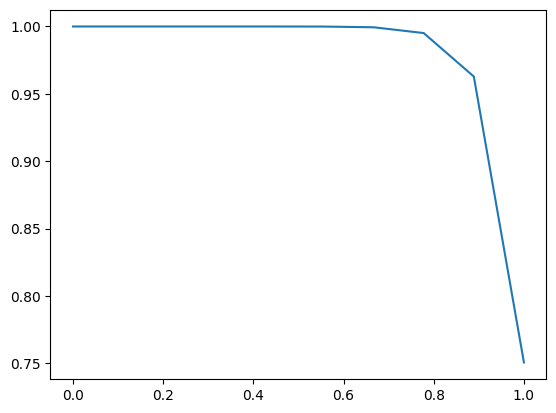

In [15]:
plt.plot(t_range, sol.y[9], label='x')
plt.show()